# Verification of impedance boundary condition

In [8]:
import numpy as np
from scipy.special import jv
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib widget

## Analytical solution

Based on *E.J. Davies, Conduction and Induction Heating, IEE Power Engineering Series 11, 1990*, chapter 4.

In [9]:
sigma = 58e6
omega = 1e6
delta =  (2 / ( sigma * omega * 4e-7 * np.pi))**0.5
R = 0.001  # wire outer radius
print(f"delta = {delta:3e} m")
print(f"r/delta = {R/delta:.2f}")

delta = 1.656518e-04 m
r/delta = 6.04


In [10]:
m = 2**0.5 /delta
M0 = lambda x : np.absolute(jv(0, x * 1j**0.5))
J_abs_normalized = lambda r: M0(m*r)/ M0(m*R)  # normalized current density distribution, book eqn 4.10

## Comparison numerical / analytical solution

Simulation: no impedance BC, no circuits, potential-driven (wire_no_impedanceBC)

Data was extracted manually using ParaView on a radial line at half length of the wire.

Text(0, 0.5, 'normalized current density')

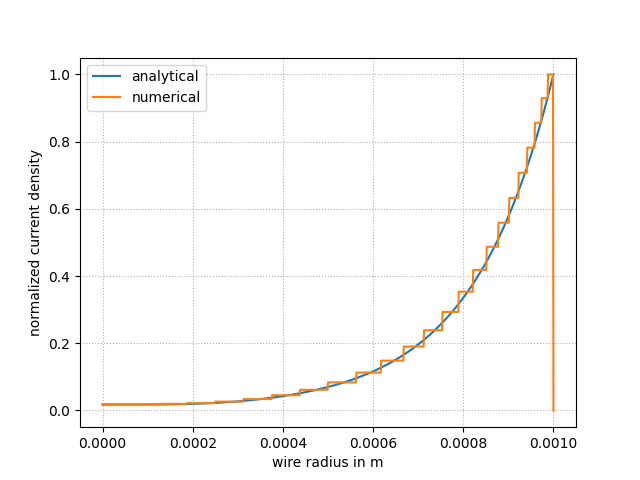

In [11]:
fig, ax = plt.subplots()

df = pd.read_csv("wire_no_impedanceBC/plot-over-line_wire.csv")
current_dty_rms = (df["current density im e:2"].to_numpy()**2 + df["current density re e:2"].to_numpy()**2)**0.5

r = np.linspace(0, R, 100)
ax.plot(r, J_abs_normalized(r), label="analytical")
ax.plot(df["Points:1"], current_dty_rms / current_dty_rms.max(), label="numerical")
ax.legend()
ax.grid(linestyle=":")
ax.set_xlabel("wire radius in m")
ax.set_ylabel("normalized current density")



## Comparison between simulations

Data was extracted manually using ParaView on a radial line at half length of the wire.

Text(0, 0.5, 'magnetic flux density magnitude in T')

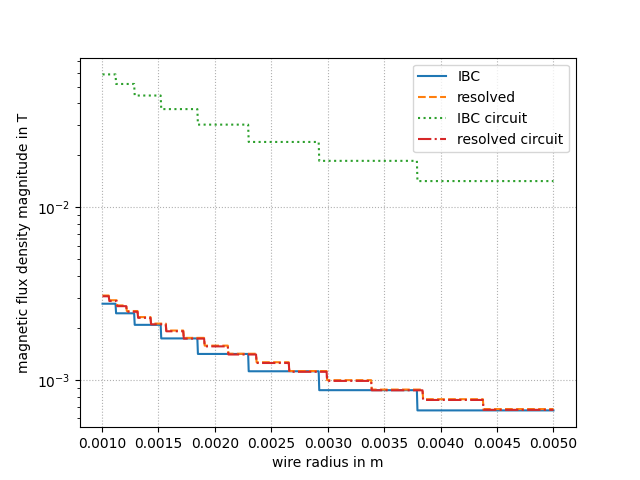

In [26]:
fig, ax = plt.subplots()

for case, label, style in zip(
    ["wire_impedanceBC", "wire_no_impedanceBC", "wire_impedanceBC_circuit", "wire_no_impedanceBC_circuit"],
    ["IBC", "resolved", "IBC circuit", "resolved circuit"],
    ["-", "--", ":", "-."]
    ):
    df = pd.read_csv(f"{case}/plot-over-line_wire-air.csv")
    df = df.loc[df["Points:1"] > 0.001]
    flux = np.sqrt(
        df["magnetic flux density re e:0"].to_numpy()**2
        + df["magnetic flux density re e:1"].to_numpy()**2
        + df["magnetic flux density re e:2"].to_numpy()**2
    )
    ax.semilogy(df["Points:1"], flux, style, label=label)
ax.legend()
ax.grid(linestyle=":")
ax.set_xlabel("wire radius in m")
ax.set_ylabel("magnetic flux density magnitude in T")

### Circuits results
#### With impedance BC

In [1]:
from IPython.display import display
from pyelmer.post import dat_to_dataframe

df = dat_to_dataframe("wire_impedanceBC_circuit/results/open_wire.dat")
display(df)

,res: eddy current power,res: electromagnetic field energy,res: surface current power,res: time,res: i_v1 re,res: i_v1 im,res: i_component(1) re,res: i_component(1) im,res: v_v1 re,res: v_v1 im,res: v_component(1) re,res: v_component(1) im,res: u_1_circuit_1 re,res: u_1_circuit_1 im,res: r_component(1),res: p_dc_component(1)
0,2.707224e-17,0.000282,2.666534e-10,1.0,-6027.067342,-0.005716,6027.067342,0.005716,-1.0,-3.543436e-25,1.0,7.398829e-23,1.0,3.382486e-25,0.000166,6027.06706


#### Without impedance BC

In [2]:
df = dat_to_dataframe("wire_no_impedanceBC_circuit/results/open_wire.dat")
display(df)

,res: eddy current power,res: electromagnetic field energy,res: time,res: i_v1 re,res: i_v1 im,res: i_component(1) re,res: i_component(1) im,res: v_v1 re,res: v_v1 im,res: v_component(1) re,res: v_component(1) im,res: u_1_circuit_1 re,res: u_1_circuit_1 im,res: r_component(1),res: p_dc_component(1)
0,7.881365,0.000148,1.0,-15.76273,295.219548,15.76273,-295.219548,-1.0,-3.426294e-25,1.0,-2.958282e-20,1.0,1.346168e-24,3188.217887,2.786600e+08
